## Load Amazon Review Data

This notebook will load the Amazon Review Data for the Toy category. The data is an open data set hosted on AWS and can be accessed at https://s3.amazonaws.com/amazon-reviews-pds/readme.html

In [80]:
import AmazonReviews

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

%config InlineBackend.figure_format = 'png'

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

A custom class was developed to load the Amazon review data. This same class can be utilized for any of the Amazon review data files. The data was download to our data directory and will now be loaded. The data is filterd to be only from 2014 to 2015. The fitler is configurable.

In [2]:
ar = AmazonReviews.AmazonReviews()

PATH = '../data/amazon_reviews_us_Toys_v1_00.tsv'
ar.load_data(PATH)

print(ar.date_filter)

Read from pickle...
2014-01-01 00:00:00


The `load_data` function will attempt to read the file from a pickle file, if one does not exist, then the data is loaded from the raw file. If the data is read from a raw file, then a pickle is created for subsequent loads. The pickled data is the **unfiltered** data frame.

The result of loading the data is a populated data frame called `reviews_df`.

In [3]:
ar.reviews_df.sample(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
292616,US,1693396,R1PMOVZWT5LPI4,B00M163W60,484727523,Beados Pink Princess Starter Pack,Toys,5.0,0.0,0.0,N,Y,Wonderful Gift for Granddaughter,Great gift for our granddaughter.,2015-07-09
482485,US,4541678,R2Q03GKAG76SUC,B002UKK4TU,841045885,Jilly Pink and White Zhu Zhu Pets Hamster Kids...,Toys,1.0,0.0,0.0,N,Y,Was very disappointed! I received this and it ...,Was very disappointed! I received this and it...,2015-05-31
2082947,US,33343241,R2ZJSWNDUPBTUA,B0043WMALS,188605103,Lords Of Vegas,Toys,5.0,0.0,0.0,N,Y,Great game. Strategic choices,"Great game. Strategic choices, risk vs reward...",2014-09-14
266114,US,5571892,R6BXPNR5DSYO9,B00FJ7MYBW,389568960,Hot Wheels Monster Jam Grave Digger Die-Cast V...,Toys,5.0,0.0,0.0,N,Y,Five Stars,GOOD,2015-07-14
1049605,US,14145421,R18BCHRJBRLRS4,B00HD26W50,838755787,GPM Alloy Fuel Tank Cap for 1:5 HPI Baja 5B + ...,Toys,5.0,0.0,0.0,N,N,Nice upgrade!,No leaks! Fits just right!,2015-02-17


The review data for Toys is now loaded. Next, we need to determine what products are trending. The trending metric is calculated 30 days from the first review of each product. Within those 30 days for each product, a trend score is calcualted as the following,

$$Review Rate = \frac{Total Reviews}{Review Window}$$

$$Reiew Success = \frac{Review Rate * Median Score}{Std Score}$$

The `star_rating` is from 1 to 5. I wanted to differentiate more from a 1 to a 5, so each star rating is raised to 1.5, prior to calculating median and standard deviation. 

Lastly, the `review_success` is tranformed into a `trend_score` by utilizing a `tanh` function.

In [4]:
ar.calc_trend_score()

In [5]:
ar.create_observationsbservations()

In [7]:
ar.obs[ar.obs.trend == 1].to_csv('../data/trending_reviews.csv')

In [51]:
stop_words = set(STOPWORDS)
stop_words.update(['br', 'year','got','toy', 'one'])

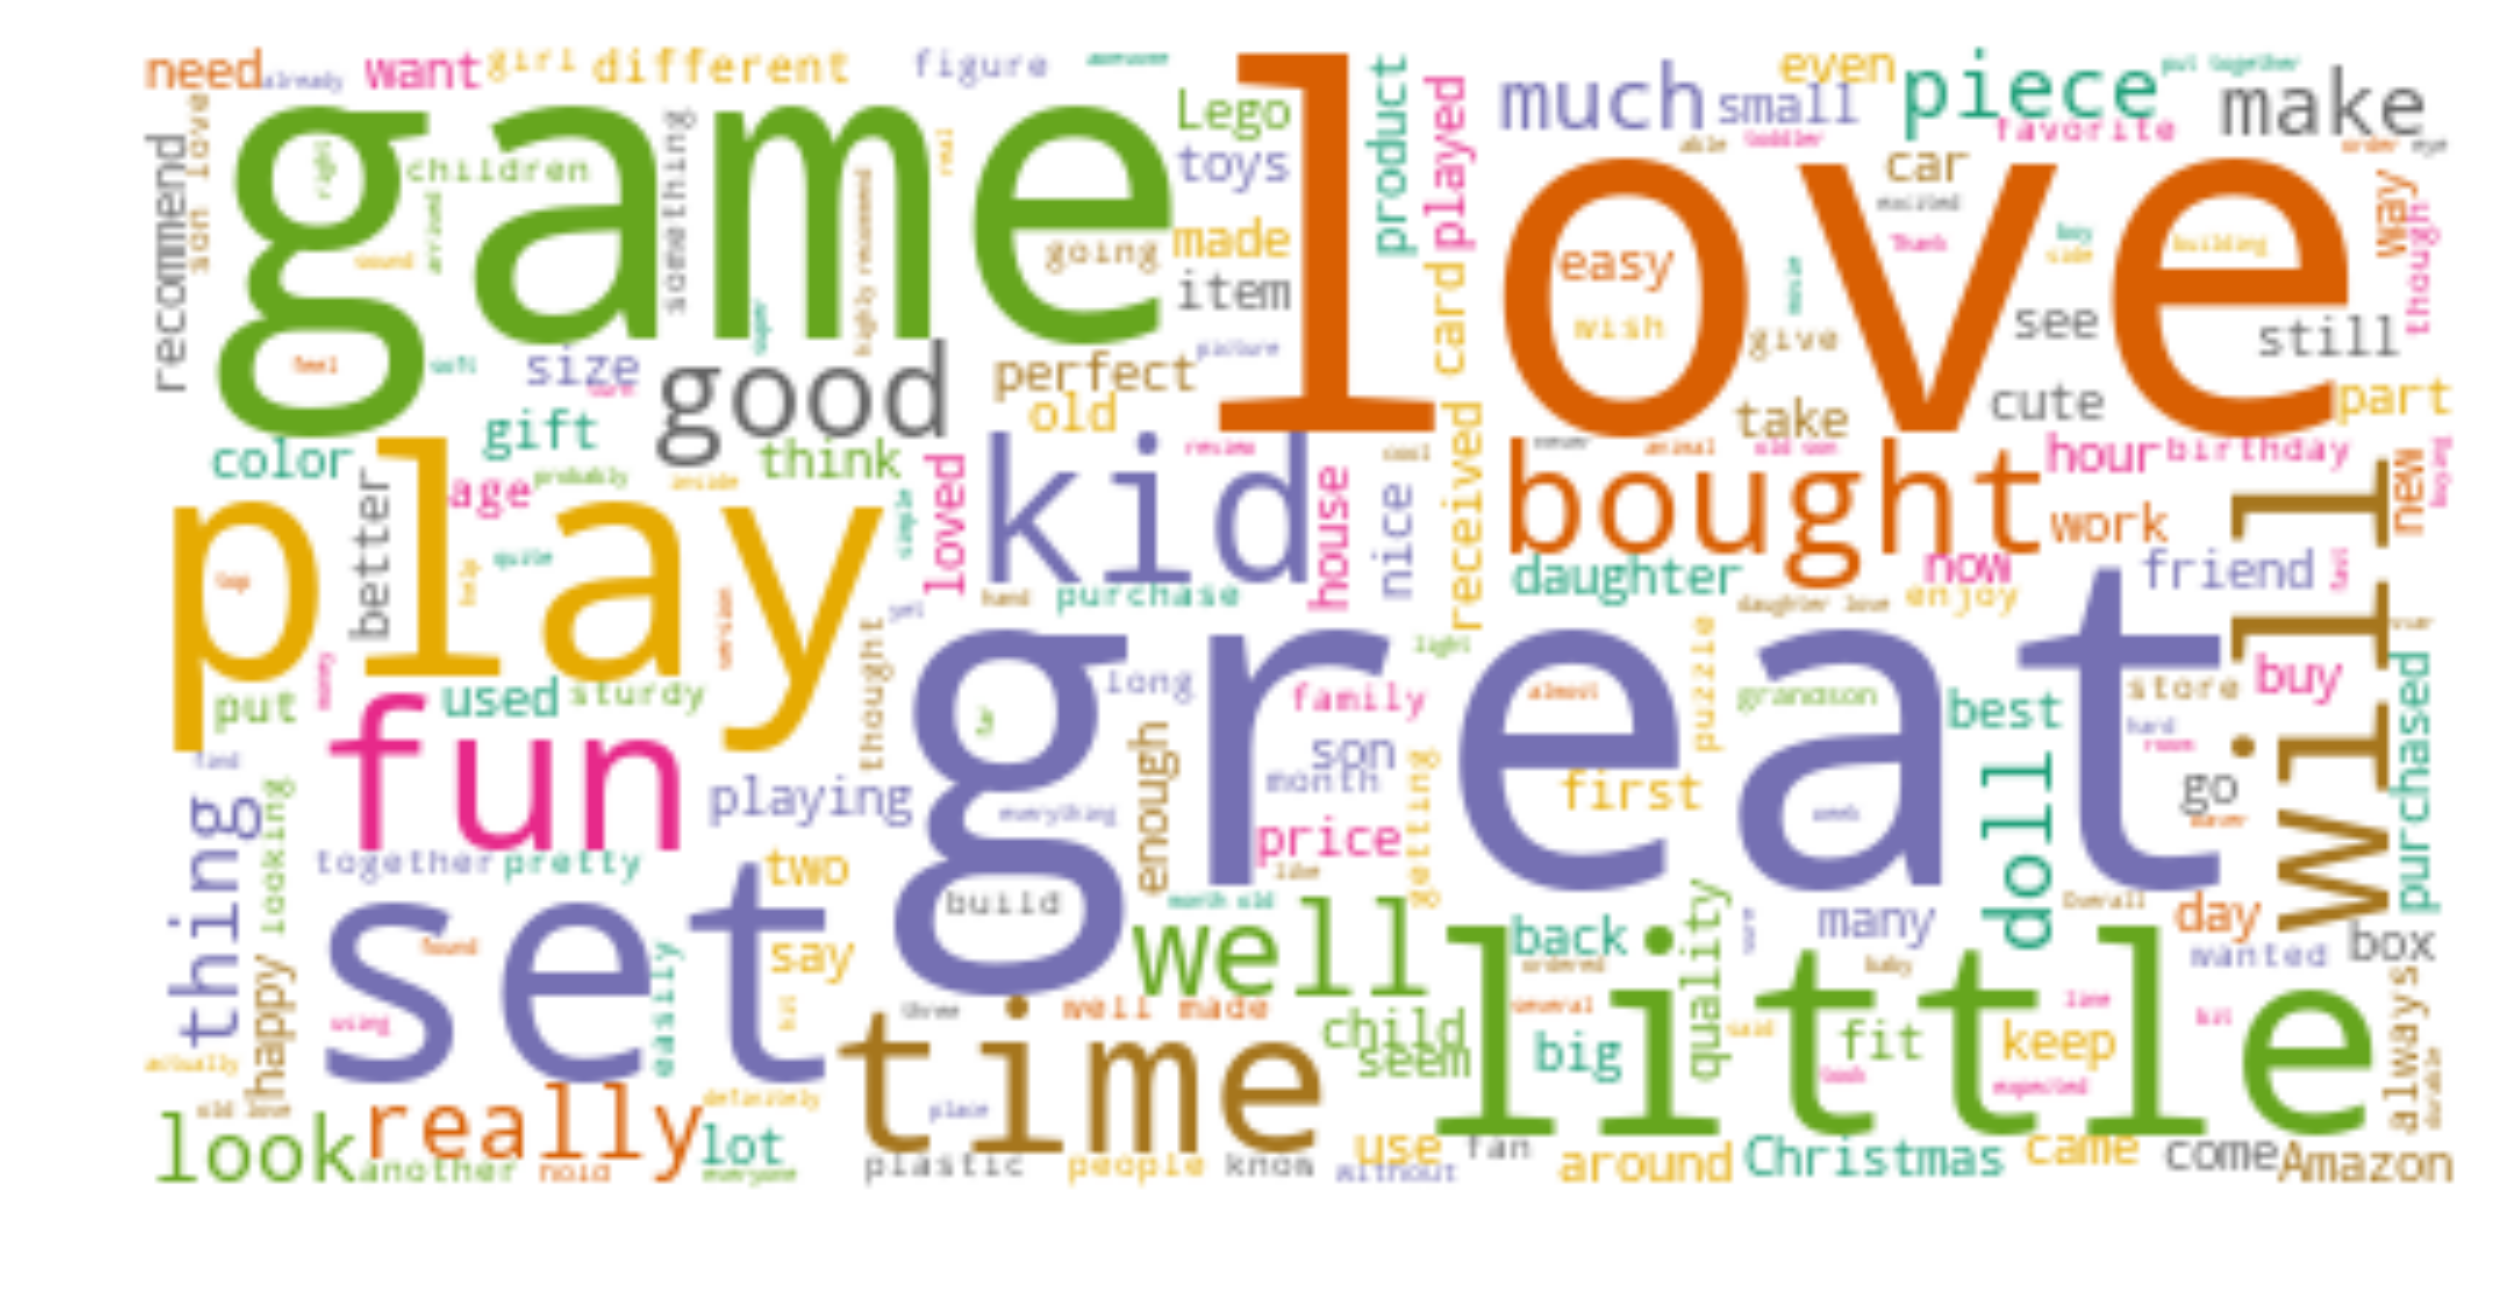

In [47]:
text = ' '.join(ar.obs.loc[ar.obs.trend==1,'review_body'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white', stopwords=stop_words, colormap='Dark2').generate(text)

plt.figure(figsize=[10,10])
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

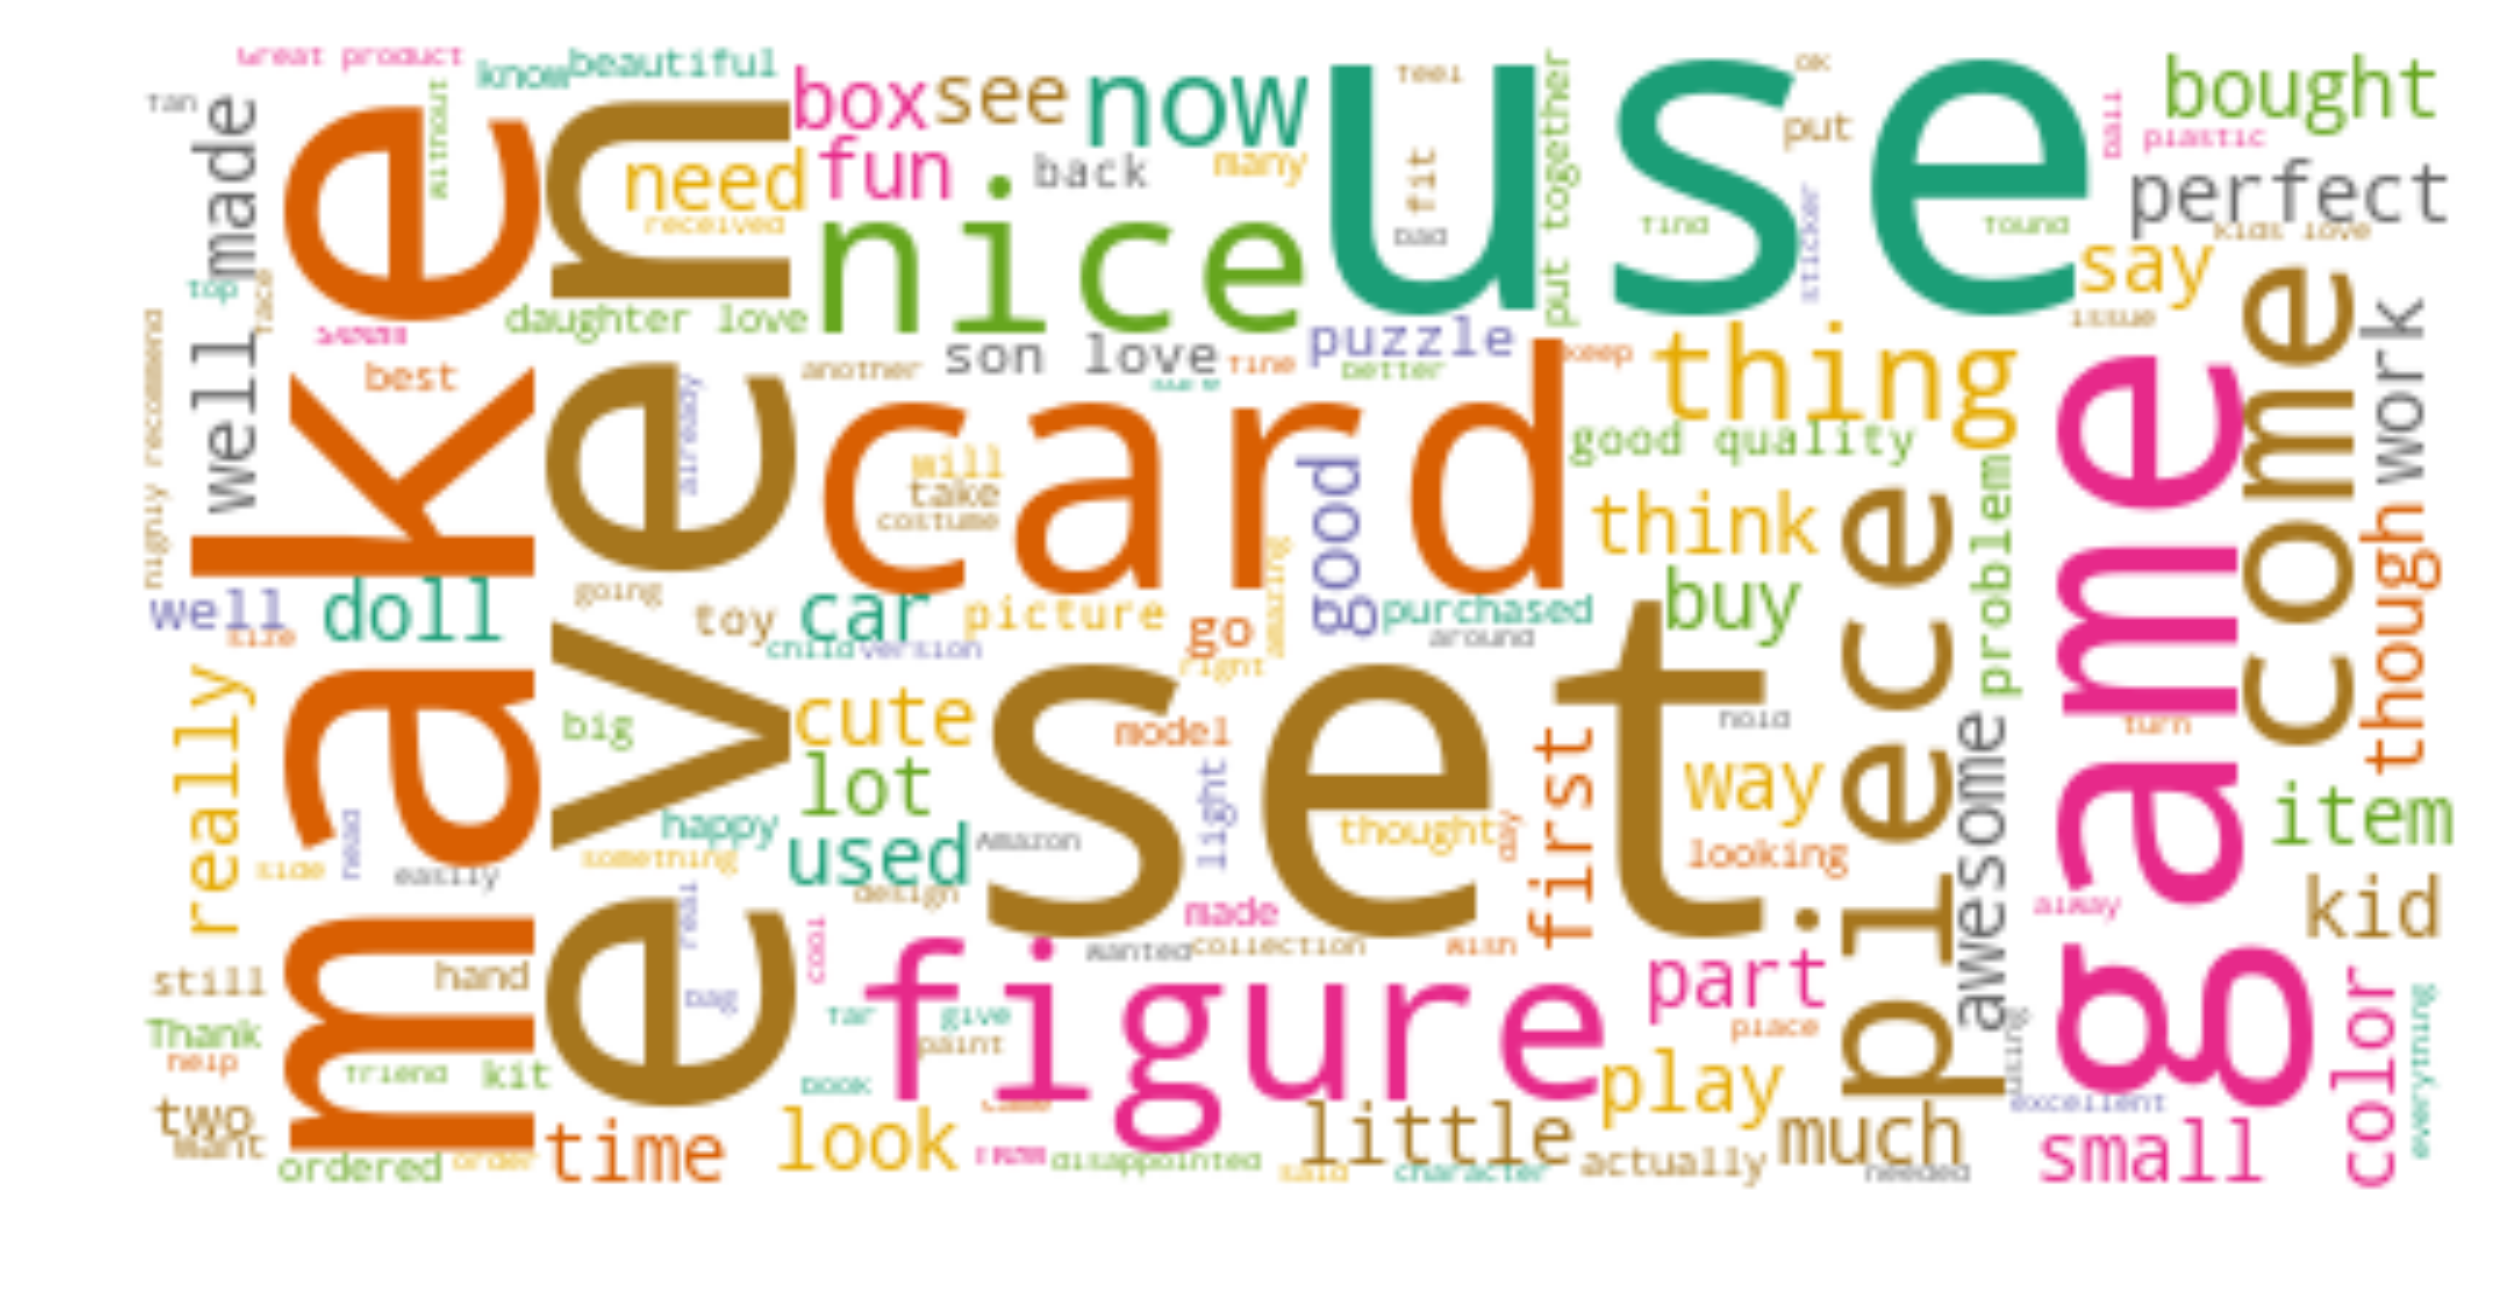

In [52]:
text = ' '.join(ar.obs.loc[ar.obs.trend==0,'review_body'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white', stopwords=stop_words, colormap='Dark2').generate(text)

plt.figure(figsize=[10,10])
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
top_products = ar.reviews_selected_df.product_id.value_counts().head(100)

ar.obs[ar.obs.product_id.isin(top_products.index) ]

,product_id,review_date,review_id,review_body,star_rating,trend
346,0975277324,2014-01-31,R1WI3K6JLAYZOZ,This is a really great board game. Turns are ...,5.0,1
361,0976990709,2014-02-02,R35QBJHCXY2MGN,"Great concept, great for the kids but........t...",3.0,1
1656,1933054395,2014-01-31,RWNR403AKUY5T,My daughter is 5 and half and she loves playin...,5.0,1
1933,8499000606,2014-01-31,R22WZ4JSCSRTG0,I bought one of these for all the grown boys o...,5.0,1
2303,B00000ISC5,2014-02-02,R1EOVAU2LBBTE7,"My son loved it! Very uncomplicated, Educatio...",5.0,1
2413,B00000IV35,2014-02-01,RV4Q9D58HL7YS,I gave this to a friend as a gift and she play...,5.0,1
2605,B00000J0S3,2014-01-31,R35L95S3AVETDH,"Quality pencils great deal for the price, so m...",5.0,1
2757,B00000JIVS,2014-01-31,R3QJ1QM6WEE749,Remember 10 x 10 inches is not very big....it'...,4.0,1
2861,B00000K3BR,2014-02-01,R3BE0UQWKEWR40,I bought this for my 4 year old grandson for C...,5.0,1
3403,B00004TZY8,2014-02-04,RDWVPXNQ6NNBM,The classic version of Uno. The original and ...,5.0,1


In [119]:
#B00LK1YMD4 - not trend
#0975277324 - trend
title = ar.reviews_selected_df.loc[ar.reviews_selected_df.product_id == '0975277324', 'product_title'].head(1)
title.values

array(['Ticket To Ride'], dtype=object)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


''

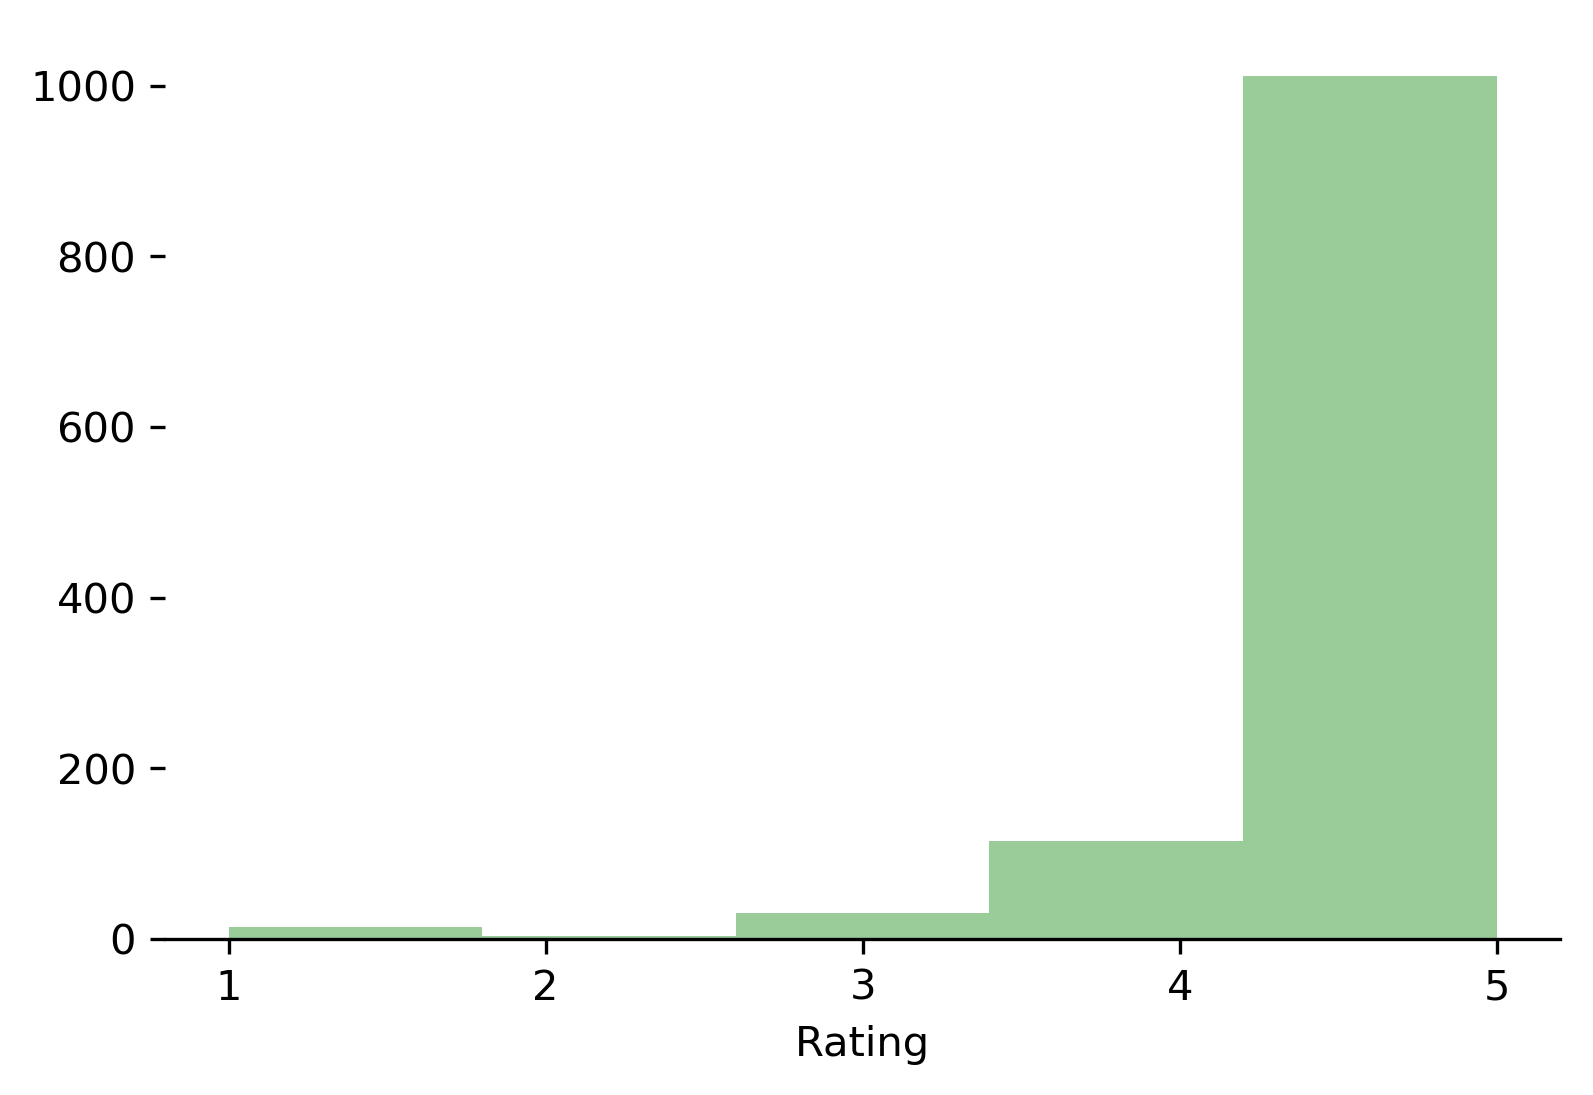

In [127]:
trend_data = ar.reviews_selected_df.loc[ar.reviews_selected_df.product_id.isin(['0975277324']), ['star_rating']]

fig, ax = plt.subplots()

sns.distplot(trend_data,kde=False, color='green', bins=5)
plt.xticks(range(1,6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('Rating')
# plt.title('Ticket to Ride')
;

In [122]:
title = ar.reviews_selected_df.loc[ar.reviews_selected_df.product_id == 'B00LK1YMD4', 'product_title'].head(1)
title.values

array(['The Amazing WUBBLE Bubble Ball - Looks like a bubble, plays like a ball! Blue'],
      dtype=object)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


''

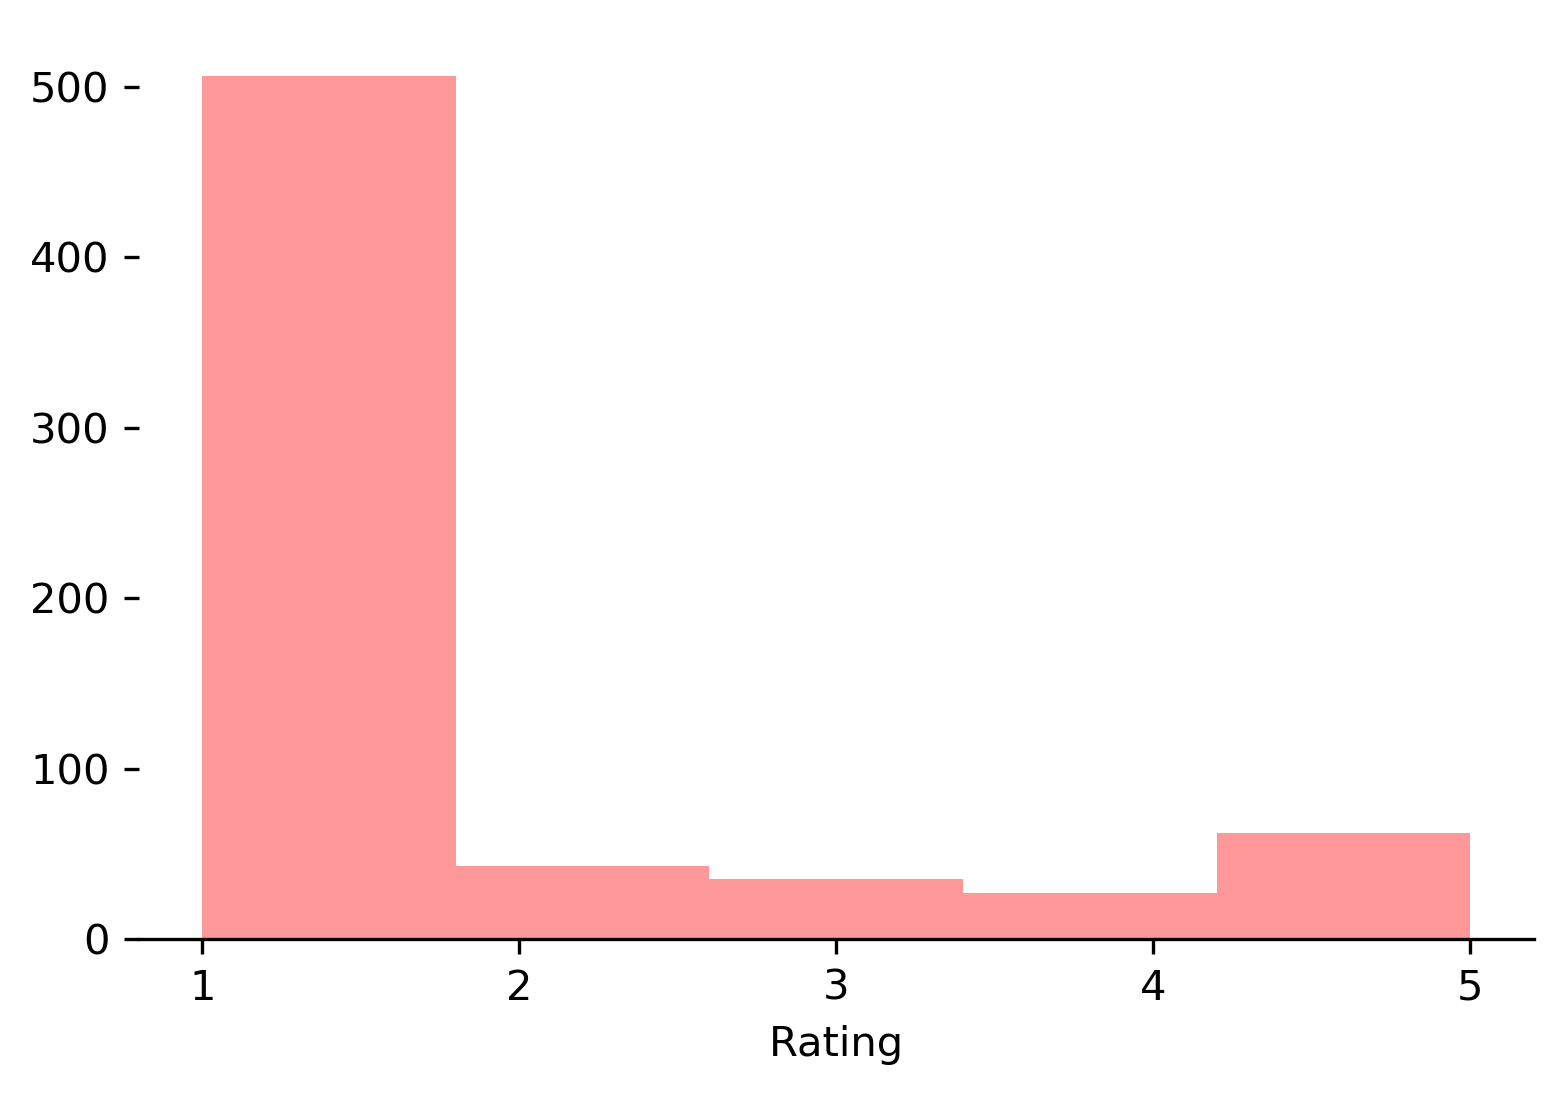

In [128]:
#B00LK1YMD4 - not trend
#0975277324 - trend

trend_data = ar.reviews_selected_df.loc[ar.reviews_selected_df.product_id.isin(['B00LK1YMD4']), ['star_rating']]
fig, ax = plt.subplots()

sns.distplot(trend_data,kde=False, color='red', bins=5)
plt.xticks(range(1,6))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xlabel('Rating')
# plt.title('The Amazing WUBBLE Bubble Ball - Looks like a bubble, plays like a ball! Blue')
;

In [93]:
trend_data

,product_id,star_rating
719764,B00LK1YMD4,1.0
719765,B00LK1YMD4,1.0
719766,B00LK1YMD4,1.0
719767,B00LK1YMD4,1.0
719768,B00LK1YMD4,1.0
719769,B00LK1YMD4,1.0
719770,B00LK1YMD4,5.0
719771,B00LK1YMD4,2.0
719772,B00LK1YMD4,3.0
719773,B00LK1YMD4,1.0
